<a href="https://colab.research.google.com/github/ltocasuche/Metodos1_Fernando_Bareno_Y_Laura_Tocasuche/blob/main/Parcial_3_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

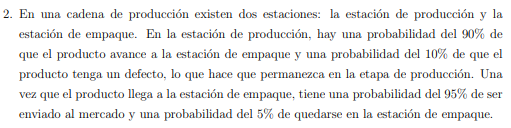

In [40]:
# a El producto puede estar en tres estados: En estado de producción, en estado de empaque o entregado en el mercado.
# b * S_1 = Producción. S_2 = Empaquetado. S_3 = Mercado.
# c

S_1 = np.array([0.1,0.9,0])
S_2 = np.array([0,0.05,0.95])
S_3 = np.array([0,0,1])
T = np.array([S_1,S_2,S_3])
T

array([[0.1 , 0.9 , 0.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.  , 1.  ]])

In [41]:
def Get_estado_estable (pi, T):
    pi_nuevo = np.dot(pi,T)
    while abs(pi-pi_nuevo).any()>1e-15:
        pi = pi_nuevo
        pi_nuevo = np.dot(pi,T)
    return pi

In [67]:
pi = Get_estado_estable(np.array([1,0,0]),T)
pi
#Esto indica que, a largo plazo, el sistema es absorbente: eventualmente, todos los productos terminan en el mercado sin posibilidad de regresar a las estaciones previas.
# π1(0.1)+π2(0.)+π3(0.) = π1
# π1(0.9)+π2(0.05)+π3(0.) = π2
# π1​(0.)+π2(0.95)+π3(1.) = π3
# usando la condicion: π1 + π2 + π3 = 1
# resolviendo: [0., 0., 1.]



array([0., 0., 1.])

In [47]:
prob_ambas_ocupadas = round(pi[0] * pi[1] * 100, 3)
print(f"La probabilidad de que ambas estaciones esten ocupadas al mismo tiempo es del {prob_ambas_ocupadas}%")

La probabilidad de que ambas estaciones esten ocupadas al mismo tiempo es del 0.0%


In [48]:
prob_al_menos_una_ocupada = round((1 - pi[2]) * 100, 2)
print(f"La probabilidad de que al menos una estación esté ocupada es del {prob_al_menos_una_ocupada}%")

La probabilidad de que al menos una estación esté ocupada es del 0.0%


In [49]:
prob_produccion_vacia = round((pi[1] + pi[2])*100,2)
print(f"La probabilidad de que la estación de producción esté vacía es del {prob_produccion_vacia}%")

La probabilidad de que la estación de producción esté vacía es del 100.0%


In [ ]:
#CASINO TRAMPOSO

Secuencia oculta más probable:
Secuencia Oculta          (1, 1, 1, 1, 0, 0, 0, 0)
Probabilidad                              0.000191
Probabilidad Acumulada                    0.000191
Name: 0, dtype: object

Secuencias que explican el 20% de la probabilidad acumulada:
             Secuencia Oculta  Probabilidad  Probabilidad Acumulada
0    (1, 1, 1, 1, 0, 0, 0, 0)  1.911030e-04                0.000191
1    (0, 0, 0, 0, 0, 0, 0, 0)  1.638400e-04                0.000355
2    (1, 1, 1, 0, 0, 0, 0, 0)  1.061683e-04                0.000461
3    (1, 1, 1, 1, 1, 1, 1, 1)  9.906778e-05                0.000560
4    (1, 1, 1, 1, 0, 0, 0, 1)  8.599634e-05                0.000646
..                        ...           ...                     ...
251  (1, 0, 0, 0, 1, 0, 1, 0)  5.120000e-09                0.001934
252  (1, 0, 1, 0, 1, 0, 1, 1)  4.147200e-09                0.001934
253  (0, 1, 0, 0, 1, 0, 1, 0)  2.880000e-09                0.001934
254  (0, 0, 1, 0, 1, 0, 1, 0)  2.880000e-09        

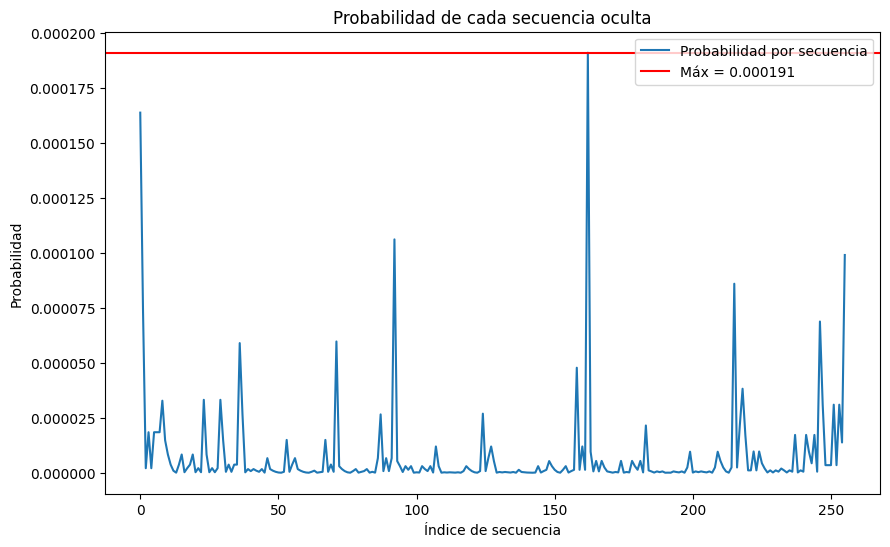

Probabilidad total: 1.0
Suma de probabilidades: 1.0000


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
import pandas as pd

States = np.array([0, 1])
Prior = np.array([0.2, 0.8])

T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])

Obs = np.array([1, 0, 0, 0, 1, 0, 1, 0])  # S = 1, C = 0
DictStates = {0: 'J', 1: 'B'}  # Moneda
DictObs = {0: 'C', 1: 'S'}  # Cara, Sello

def GetStates(State, N):
    CStates = list(combinations_with_replacement(State, N))
    Permu = []
    for it in CStates:
        p = list(permutations(it, N))
        for i in p:
            if i not in Permu:
                Permu.append(i)
    return np.array(Permu)

HiddenStates = GetStates(States, len(Obs))

def GetProb(T, E, Obs, State, Prior):
    n = len(Obs)
    p = Prior[State[0]]
    for i in range(n - 1):
        p *= T[State[i + 1], State[i]]
    for i in range(n):
        p *= E[Obs[i], State[i]]
    return p

P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
    P[i] = GetProb(T, E, Obs, HiddenStates[i], Prior)

df = pd.DataFrame({'Secuencia Oculta': [tuple(s) for s in HiddenStates], 'Probabilidad': P})
df = df.sort_values(by='Probabilidad', ascending=False).reset_index(drop=True)
df['Probabilidad Acumulada'] = df['Probabilidad'].cumsum()

limite = 0.2
df_20 = df[df['Probabilidad Acumulada'] <= limite]

print("Secuencia oculta más probable:")
print(df.iloc[0])

print("\nSecuencias que explican el 20% de la probabilidad acumulada:")
print(df_20)

plt.figure(figsize=(10, 6))
plt.plot(P, label="Probabilidad por secuencia")
plt.axhline(y=max(P), color='r', linestyle='-', label="Máx = {:.6f}".format(max(P)))
plt.title("Probabilidad de cada secuencia oculta")
plt.xlabel("Índice de secuencia")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

P /= np.sum(P)
p_obs = np.sum(P)
print(f"Probabilidad total: {p_obs}")
print(f"Suma de probabilidades: {np.sum(P):.4f}")


G: La probabilidad a priori influye en los resultados cuando la secuencia de observaciones es relativamente corta. En esos casos, al no existir suficiente evidencia de las transiciones y emisiones para "corregir" la suposición inicial, esta tiene mayor impacto. Sin embargo, a medida que la secuencia observada se hace más larga, las probabilidades de transición y emisión se hacen más importantes.

In [ ]:
#GAS DIATÓMICO

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [12]:
file = '/content/drive/MyDrive/Velocidad.csv'
file

'/content/drive/MyDrive/Velocidad.csv'

In [15]:
data = pd.read_csv(file,sep=',')
data.keys()

Index(['Velocidad'], dtype='object')

In [16]:
X = data['Velocidad']
len(X)

3000

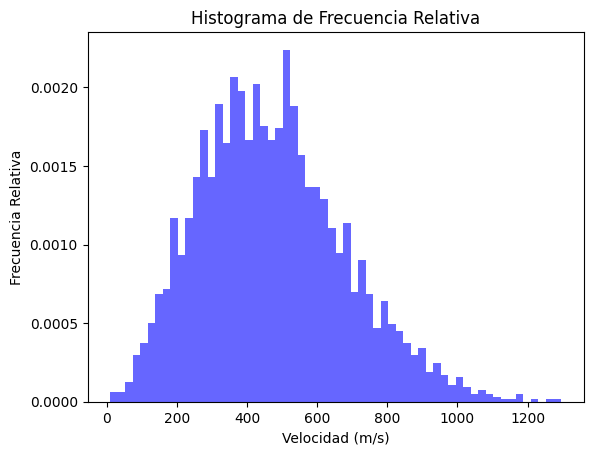

In [20]:
import matplotlib.pyplot as plt
import numpy as np
n = 60
frecuencias, bins, _ = plt.hist(X, bins=n, density=True, alpha=0.6, color='b')

plt.title('Histograma de Frecuencia Relativa')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia Relativa')
plt.show()

In [21]:
promedio_empirico = np.mean(X)
print(f"promedio empirico: {promedio_empirico:.2f} m/s")

promedio empirico: 472.18 m/s


In [22]:
M = 0.028
kB = 8.31

def Likelihood(v, T):
    factor = (M / (2 * np.pi * kB * T))**1.5
    return factor *(4 * np.pi * v**2)* np.exp((-M * v**2) / (2 * kB * T))

temperatura estimada: 297.90 K


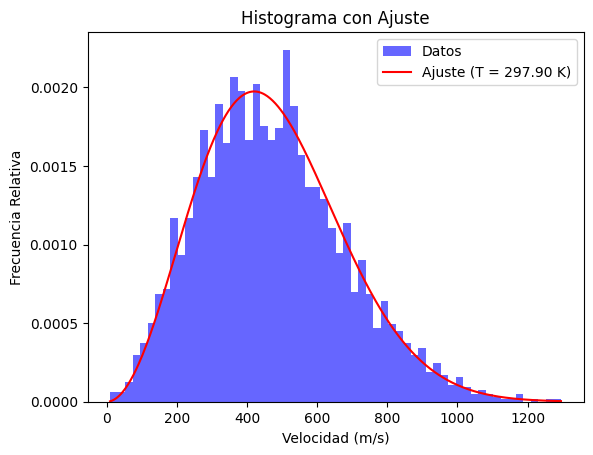

In [24]:
from scipy.optimize import minimize

def costo(T, velocities):
    return -np.sum(np.log(Likelihood(velocities, T)))

T_ini = 300
result = minimize(costo, T_ini, args=(X,))
T_est = result.x[0]
print(f"temperatura estimada: {T_est:.2f} K")

v_range = np.linspace(min(X), max(X), 500)
plt.hist(X, bins=n, density=True, alpha=0.6, color='b', label='Datos')
plt.plot(v_range, Likelihood(v_range, T_est), 'r-', label=f'Ajuste (T = {T_est:.2f} K)')
plt.title('Histograma con Ajuste')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia Relativa')
plt.legend()
plt.show()

In [25]:
vp = np.sqrt((2 * kB * T_est) / M)
vm = np.sqrt(2 / np.pi) * vp
v_cuadratica = np.sqrt((3 * kB * T_est) / M)

print(f"Velocidad más probable: {vp:.2f} m/s")
print(f"Velocidad promedio: {vm:.2f} m/s")
print(f"Velocidad cuadrática media: {v_cuadratica:.2f} m/s")


Velocidad más probable: 420.50 m/s
Velocidad promedio: 335.51 m/s
Velocidad cuadrática media: 515.01 m/s


In [29]:
import random

def metropolis_hastings(T_ini, velocidades, n_iter=10000):
    muestra = [T_ini]
    T_actual = T_ini

    for _ in range(n_iter):
        T_propuesta = np.random.normal(T_actual, 1)
        if T_propuesta > 0:
            likelihood_ratio = (
                np.sum(np.log(Likelihood(velocidades, T_propuesta))) -
                np.sum(np.log(Likelihood(velocidades, T_actual)))
            )
            if np.log(random.uniform(0, 1)) < likelihood_ratio:
                T_actual = T_propuesta
        muestra.append(T_actual)

    return np.array(muestra)

muestras = metropolis_hastings(T_est, X)
error_std = np.std(muestras)
print(f"error: {error_std:.2f} K")

error: 4.37 K


In [30]:
T_superior = np.percentile(muestras, 95)
print(f"Temperaturas superiores a {T_superior:.2f} K están excluidas con un 95% de confianza.")

Temperaturas superiores a 305.34 K están excluidas con un 95% de confianza.
